# mco3_Avellaneda_Fadrigo_Sibal_Tan

# Outline

1. Overview of Project
2. Description and crediting of Dataset
3. Data Preprocessing
4. Definition of Classification Task
    - Explain what will be classified
    - Give features and labels for ML task
    - Rationale and relevance of dataset and classification
5. Implementation and Evaluation of Classification Models
    - List and describe models to be used
    - ML code proper, with appropriate explanations

## Overview
### PLACEHOLDER TEXT:
>Project aims to implement and compare the performance of 2 ML models for a classification task of their choice. An applicable dataset was chosen and was used on the 2 ML models. A deeper-than-surface-level understanding of the ML model in the context of the dataset is required

## Dataset
This [dataset](https://www.kaggle.com/datasets/joebeachcapital/30000-spotify-songs), entitled "30000 Spotify Songs" was uploaded by [Joakin Arvidsson](https://www.kaggle.com/joebeachcapital) on [Kaggle](https://www.kaggle.com/). Additionally the dataset was locally downloaded and can be found in "/Spotify Dataset".

The dataset contains about 30,000 songs of varying genres from the Spotify API using the spotifyr package (details listed in readme in "/Spotify Dataset"). It contains information like the unique track ID, release date, genre, etc. 

The dataset has 23 columns they are as follows:
1.  track_id: Song unique ID
2.  track_name: Song name
3.  track_artist: Song artist
4.  track_popularity: Song popularity where higher is better
5.  track_album_id: Album unique ID
6.  track_album_name: Song album name
7.  track_album_release_date: Date when album released
8.  playlist_name: Name of playlist
9.  playlist_id: Playlist ID
10. playlist_genre: Playlist genre
11. playlist_subgenre: Playlist subgenre
12. danceability: Describes how suitable a track is for dancing based on different factors like tempo, rhythm stability, etc. 0.0 denotes least dancable and 1.0 denotes most dancable.
13. energy: Measured from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. 
14. key: The estimated overall key of the track.
15. loudness: The overall loudness of a track in decibels (dB). Typically range from -60 to 0 dB.
16. mode: Mode indicates the modality (major or minor) of a track. 1 represents Major and 0 represents Minor
17. speechiness: Detects the presence of spoken words in a track. Values close to 1.0 likely indicate a talk show or podcast. Values above 0.66 means that tracks are probably made entirely of spoken words. 0.33 to 0.66 means that the track may have both music and speech. Values below 0.33 represent music or non-speech tracks. 
18. acousticness: Confidence measure from 0.0 to 1.0 whether the track is acoustic. A higher value means a higher confidence. 
19. instrumentalness: Predicts whether a track contains no vocals. Values above 0.5 intend to represent musical tracks, with the values approching 1.0 denote a higher degree of confidence.
20. liveness: Detects the presence of an audience in the recording. Values above 0.8 indicate that a track likely recorded live.
21. valence: Measured from 0.0 to 1.0 describing the musical positiveness conveyed by a track. 
22. tempo: The overall estimated tempo of a track in beats per minute (BPM). 
23. duration_ms: Duration of song in milliseconds


## Preprocessing

### Importing libraries of preprocessing and data visualization

In [197]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
# keep plt inline in ntbk instead of new window
%matplotlib inline

from sklearn import preprocessing

plt.rcParams['figure.figsize'] = (6.0, 6.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# autoreload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%reload_ext autoreload
%autoreload 2

### Load the dataset for visualization and preprocessing

In [198]:
df = pd.read_csv('../MCO3-MachineLearning/Spotify_Dataset/spotify_songs.csv')

In [199]:
# show general info and check for NULL values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32833 entries, 0 to 32832
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   track_id                  32833 non-null  object 
 1   track_name                32828 non-null  object 
 2   track_artist              32828 non-null  object 
 3   track_popularity          32833 non-null  int64  
 4   track_album_id            32833 non-null  object 
 5   track_album_name          32828 non-null  object 
 6   track_album_release_date  32833 non-null  object 
 7   playlist_name             32833 non-null  object 
 8   playlist_id               32833 non-null  object 
 9   playlist_genre            32833 non-null  object 
 10  playlist_subgenre         32833 non-null  object 
 11  danceability              32833 non-null  float64
 12  energy                    32833 non-null  float64
 13  key                       32833 non-null  int64  
 14  loudne

In [200]:
df.head()

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052


In [201]:
df.describe()

,track_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
count,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000
mean,42.477081,0.654850,0.698619,5.374471,-6.719499,0.565711,0.107068,0.175334,0.084747,0.190176,0.510561,120.881132,225799.811622
std,24.984074,0.145085,0.180910,3.611657,2.988436,0.495671,0.101314,0.219633,0.224230,0.154317,0.233146,26.903624,59834.006182
min,0.000000,0.000000,0.000175,0.000000,-46.448000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4000.000000
25%,24.000000,0.563000,0.581000,2.000000,-8.171000,0.000000,0.041000,0.015100,0.000000,0.092700,0.331000,99.960000,187819.000000
50%,45.000000,0.672000,0.721000,6.000000,-6.166000,1.000000,0.062500,0.080400,0.000016,0.127000,0.512000,121.984000,216000.000000
75%,62.000000,0.761000,0.840000,9.000000,-4.645000,1.000000,0.132000,0.255000,0.004830,0.248000,0.693000,133.918000,253585.000000
max,100.000000,0.983000,1.000000,11.000000,1.275000,1.000000,0.918000,0.994000,0.994000,0.996000,0.991000,239.440000,517810.000000


### Check and remove rows if there are null cells in the dataset

NaN values are removed or replaced in ML models because there are cases wherein the ML model cannot handle NaN values. Additionally, cleaning the dataset to avoid NaN values could increase the accuracy and efficiency of the model.

In [202]:
nan_rows = df.isna().any(axis=1)
np.nonzero(nan_rows)

(array([ 8151,  9282,  9283, 19568, 19811], dtype=int64),)

In [203]:
df.iloc[8151]

track_id                    69gRFGOWY9OMpFJgFol1u0
track_name                                     NaN
track_artist                                   NaN
track_popularity                                 0
track_album_id              717UG2du6utFe7CdmpuUe3
track_album_name                               NaN
track_album_release_date                2012-01-05
playlist_name                              HIP&HOP
playlist_id                 5DyJsJZOpMJh34WvUrQzMV
playlist_genre                                 rap
playlist_subgenre                 southern hip hop
danceability                                 0.714
energy                                       0.821
key                                              6
loudness                                    -7.635
mode                                             1
speechiness                                  0.176
acousticness                                 0.041
instrumentalness                               0.0
liveness                       

Rows 8151, 9282, 9283, 19568 and 19811 contain NaN values.

Using python pandas, removing these NaN values is as simple as using the [dropna()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html) function

In [204]:
df = df.dropna()

In [205]:
nan_rows = df.isna().any(axis=1)
np.nonzero(nan_rows)

(array([], dtype=int64),)

It can be seen that that nan_rows is empty. Indicating that the rows containing a NaN value have been removed from the dataframe.

### Obtaining Input and Output data
- Input Data:   The features that the model will use to make predictions
- Output Data:  The target variable that the model aims to predict

The output variable chosen for this model is "playlist_genre"

In [206]:
output = df['playlist_genre']
output = output.to_frame()
output.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32828 entries, 0 to 32832
Data columns (total 1 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   playlist_genre  32828 non-null  object
dtypes: object(1)
memory usage: 512.9+ KB


Because the "playlist_genre" is non-numeric. The researchers will map the unique genres and replace the values in the dataframe.

In [207]:
genres = output['playlist_genre'].unique()
genres

array(['pop', 'rap', 'rock', 'latin', 'r&b', 'edm'], dtype=object)

In [208]:
mapped_genres = {genre : i for i, genre in enumerate(genres)}
mapped_genres

{'pop': 0, 'rap': 1, 'rock': 2, 'latin': 3, 'r&b': 4, 'edm': 5}

In [209]:
output = output.replace({'playlist_genre':mapped_genres})
output.head()

,playlist_genre
0,0
1,0
2,0
3,0
4,0


In [210]:
output = output.squeeze()
output.shape

(32828,)

The input data to be used to predict a songs genre are the quantified qualities of the music that was listed in the dataset.

In [211]:
features = ['danceability',
            'energy',
            'key',
            'loudness',
            'mode',
            'speechiness',
            'acousticness',
            'instrumentalness',
            'liveness',
            'valence',
            'tempo',
            'duration_ms']

In [212]:
df_features = df[features]
df_features.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32828 entries, 0 to 32832
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      32828 non-null  float64
 1   energy            32828 non-null  float64
 2   key               32828 non-null  int64  
 3   loudness          32828 non-null  float64
 4   mode              32828 non-null  int64  
 5   speechiness       32828 non-null  float64
 6   acousticness      32828 non-null  float64
 7   instrumentalness  32828 non-null  float64
 8   liveness          32828 non-null  float64
 9   valence           32828 non-null  float64
 10  tempo             32828 non-null  float64
 11  duration_ms       32828 non-null  int64  
dtypes: float64(9), int64(3)
memory usage: 3.3 MB


In [213]:
df_features.shape

(32828, 12)

### Value Normalization

Normalizing values in a machine learning model is important for serveral different reasons. These are the following:
1. Scale Consistency: The different features in the dataset may be scaled differently. ML algorithms perform better when the features of the data are of a similar scale.
2. Convergence Speed: Gradient-based optimization algorithms, which are commonly used to train machine learnign models, coverge faster when features are normalized.
3. Improves Model Performance: Normalizing the values in a dataset can improve model performance in general.
4. Avoiding Numerical Instabilities: There are cases wherein numerical instability issues can arise if the features are not normalized. 
5. Regularization: Regularization techniques, which are often used to prevent overfitting, assume that the features are on a similar scale.
6. Interpretability: Normalizing the features makes it easier to interpret the coefficients of a model.
7. Handling Different Measurement Units: In the event that a dataset has different measurement units, normalizing helps to make the features unitless, making them easier to understand for the model.

In [214]:
scaler = preprocessing.MinMaxScaler()
x = scaler.fit_transform(df_features)
df_normalized = pd.DataFrame(x, columns=features)
print(df_normalized)

       danceability    energy       key  loudness  mode  speechiness  \
0          0.760936  0.915985  0.545455  0.918090   1.0     0.063508   
1          0.738555  0.814968  1.000000  0.869162   1.0     0.040632   
2          0.686673  0.930988  0.090909  0.901368   0.0     0.080828   
3          0.730417  0.929988  0.636364  0.894118   1.0     0.111111   
4          0.661241  0.832971  0.090909  0.875385   1.0     0.039107   
...             ...       ...       ...       ...   ...          ...   
32823      0.435402  0.921986  0.181818  0.935272   1.0     0.101961   
32824      0.531027  0.785963  0.000000  0.879785   1.0     0.045752   
32825      0.538149  0.820969  0.545455  0.870628   0.0     0.052397   
32826      0.636826  0.887980  0.181818  0.902856   1.0     0.118736   
32827      0.613428  0.883980  0.454545  0.877501   0.0     0.041939   

       acousticness  instrumentalness  liveness   valence     tempo  \
0          0.102616          0.000000  0.065562  0.522704  0.509

Input data has been normalized and is ready to be fed to the model.

## Definition of Classification Task
- Spotify - output = genre, input = everything else that was a quantifiable quality, dictated by the dataset.

# TODO:
- explain why we chose to classify genre
- explain how the features and how they will help
- give rationale for choosing genre and why its relevant to us

## Machine Learning Model Implementation

Selected Models:
- XGBoost - XGBoost Classifier
- MLP Classifier - "Multi-Level Perceptron"

# TODO: 
- Describe the models chosen
- what they are, how they work, why they were chosen

Importing ML model Libraries

In [221]:
# library for dataset train/test split
from sklearn.model_selection import train_test_split

# libraries for model evaluation
from sklearn.metrics import accuracy_score, confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

# libraries for ML models
import xgboost as xgb
from sklearn.neural_network import MLPClassifier

### Split the dataset between training and testing

Train test split is 80/20 because we have a relatively large dataset of 30K+ elements and decided to use a common train/test split

In [222]:
features_train, features_test, output_train, output_test = train_test_split(df_normalized, 
                                                                            output, 
                                                                            test_size=0.25)

### XGBoost Classifier

Model Training of **XGBoost Classifier Model**

In [217]:
# objective - **explain wot objective is**
# random state - **explain wot random_state is**
model_1 = xgb.XGBClassifier(objective="binary:logistic", random_state=45)

print("Model #1: XGBOOST Classifier")
model_1.fit(features_train, output_train)
prediction_1 = model_1.predict(features_test)
acc_1 = accuracy_score(output_test, prediction_1) * 100
print(acc_1)

Model #1: XGBOOST Classifier
55.40392347995613


### Multi-layer Perceptron Classifier

Model Training of **Multi-layer Perceptron Classifier**

In [218]:
model_2 = MLPClassifier(random_state = 1, max_iter = 1000)

print("Model #2: Multi-level Perceptron Classifier")
model_2.fit(features_train, output_train)
prediction_2 = model_2.predict(features_test)
acc_2 = accuracy_score(output_test, prediction_2) * 100
print(acc_2)

Model #2: Multi-level Perceptron Classifier
52.12623370293652


### Model Evaluation and Comparison

Evaluation method: Confusion Matrix

# TODO: Interpret confusion matrix and compare

Model Testing of **XGBoost Classifier Model**

Model #1: XGBOOST Classifier
55.40392347995613


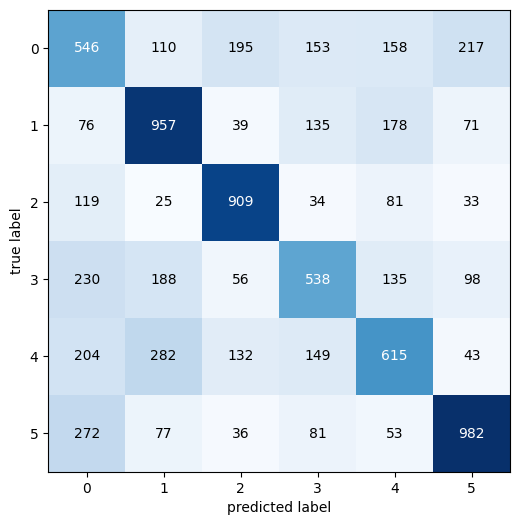

In [219]:
print("Model #1: XGBOOST Classifier")
print(acc_1)
cnf_1 = confusion_matrix(output_test, prediction_1)
fig, ax = plot_confusion_matrix(conf_mat=cnf_1)
plt.show()

Model Testing of **Multi-layer Perceptron Classifier**

Model #1: Multi-level Perceptron Classifier
52.12623370293652


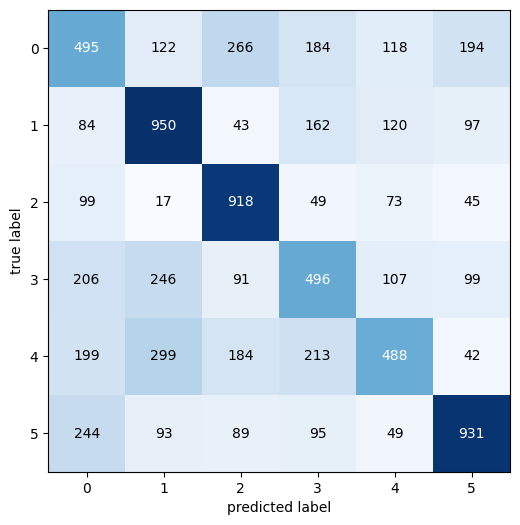

In [220]:
print("Model #1: Multi-level Perceptron Classifier")
print(acc_2)
cnf_2 = confusion_matrix(output_test, prediction_2)
fig, ax = plot_confusion_matrix(conf_mat=cnf_2)
plt.show()